In [1]:
# Carregando os dados
import pandas as pd

# Carregando dados a serem submetidos
df_test = pd.read_csv('test.csv', index_col="Id")

# Carregando dados de treinamento
df_train = pd.read_csv('train.csv', index_col="Id")


print(df_train.columns)

# Descrevendo a variavel dependente
print(df_train['SalePrice'].describe())

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [2]:
# Removendo dados faltantes
print('\n')
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)



               Total   Percent
PoolQC          1453  0.995205
MiscFeature     1406  0.963014
Alley           1369  0.937671
Fence           1179  0.807534
FireplaceQu      690  0.472603
LotFrontage      259  0.177397
GarageType        81  0.055479
GarageCond        81  0.055479
GarageFinish      81  0.055479
GarageQual        81  0.055479
GarageYrBlt       81  0.055479
BsmtFinType2      38  0.026027
BsmtExposure      38  0.026027
BsmtQual          37  0.025342
BsmtCond          37  0.025342
BsmtFinType1      37  0.025342
MasVnrArea         8  0.005479
MasVnrType         8  0.005479
Electrical         1  0.000685
RoofMatl           0  0.000000
Exterior1st        0  0.000000
RoofStyle          0  0.000000
ExterQual          0  0.000000
Exterior2nd        0  0.000000
YearBuilt          0  0.000000
ExterCond          0  0.000000
Foundation         0  0.000000
YearRemodAdd       0  0.000000
SalePrice          0  0.000000
OverallCond        0  0.000000
...              ...       ...
Garage

In [3]:
# Removendo os dados faltantes
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1) # removendo linhas
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index) # removendo colunas
print(df_train.isnull().sum().max()) # Checando se ainda existem dados faltantes

0


In [4]:
# Transformando variáveis categoricas
colunas_categoricas = df_train.select_dtypes(exclude=["number"]).columns

for col in colunas_categoricas:
    df_train[col] = df_train[col].astype('category')
    df_train[col] = df_train[col].cat.codes
    
df_train.head(5)    

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
5,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


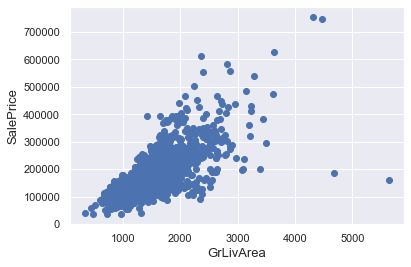

In [80]:
# Analisando outliers
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [82]:
#Deleting outliers
df_train = train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

In [5]:
# Separando as variaveis dependentes e independentes

Y = pd.DataFrame(df_train['SalePrice'])
X = df_train.drop('SalePrice', axis=1)

In [6]:
# Normalizando os dados
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
array = X.values
array = scaler.fit_transform(array)    

In [7]:
print(array.shape)
print(array)

(1459, 61)
[[0.23529412 0.75       0.0334198  ... 0.5        1.         0.8       ]
 [0.         0.75       0.03879502 ... 0.25       1.         0.8       ]
 [0.23529412 0.75       0.04650728 ... 0.5        1.         0.8       ]
 ...
 [0.29411765 0.75       0.03618687 ... 1.         1.         0.8       ]
 [0.         0.75       0.03934189 ... 1.         1.         0.8       ]
 [0.         0.75       0.04037019 ... 0.5        1.         0.8       ]]


In [8]:
array = array.transpose()
print(array.shape)
print(array)

(61, 1459)
[[0.23529412 0.         0.23529412 ... 0.29411765 0.         0.        ]
 [0.75       0.75       0.75       ... 0.75       0.75       0.75      ]
 [0.0334198  0.03879502 0.04650728 ... 0.03618687 0.03934189 0.04037019]
 ...
 [0.5        0.25       0.5        ... 1.         1.         0.5       ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [0.8        0.8        0.8        ... 0.8        0.8        0.8       ]]


In [9]:
idx = 0
for col in X.columns:
    X[col] = array[idx]
    idx+=1


In [10]:
X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.75,0.033420,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,...,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
2,0.000000,0.75,0.038795,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
3,0.235294,0.75,0.046507,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,...,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
4,0.294118,0.75,0.038561,1.0,0.0,1.0,0.0,0.0,0.0,0.250000,...,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
5,0.235294,0.75,0.060576,1.0,0.0,1.0,0.0,0.5,0.0,0.625000,...,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


In [11]:
# verificando para todas variaveis
import numpy as np

print("col      med                 desv    min    max")
for column in X.columns:
    print(str(column) + " " + str(np.mean(X[column].values)) + " " + str(np.std(X[column].values)) + " " + str(np.min(X[column].values)) + " " + str(np.max(X[column].values)))

col      med                 desv    min    max
MSSubClass 0.21694956255291697 0.248801433596915 0.0 1.0
MSZoning 0.7571967100753941 0.1580042480064373 0.0 1.0
LotArea 0.04308286684853362 0.04665331711846399 0.0 0.9999999999999999
Street 0.995887594242632 0.06399604578608607 0.0 1.0
LotShape 0.6472469728124286 0.4696279926238221 0.0 1.0
LandContour 0.9257482293808543 0.23588062931327855 0.0 1.0
Utilities 0.0006854009595613434 0.026171189982229993 0.0 1.0
LotConfig 0.7546264564770391 0.40560777082689264 0.0 1.0
LandSlope 0.031185743660041124 0.13811382066809788 0.0 1.0
Neighborhood 0.5101667809001599 0.25029762723021926 0.0 1.0
Condition1 0.2539410555174777 0.10856433969704342 0.0 1.0
Condition2 0.28688925878781935 0.03700569358084181 0.0 1.0
BldgType 0.12337217272104181 0.29955188019927387 0.0 1.0
HouseStyle 0.4336629785567413 0.2726409476652587 0.0 1.0
OverallQual 0.5666742822328841 0.15363298328886094 0.0 1.0
OverallCond 0.5719671007539411 0.1390871650921695 0.0 1.0
YearBuilt 0.71915

In [12]:
# Avaliando variável dependente
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
import math

# Histograma e distribuição normal
def plot_dist(var):
    sns.distplot(var, fit=norm)
    fig = plt.figure()
    res = stats.probplot(var, plot=plt)
    
plot_dist(Y['SalePrice'])
Y['SalePrice'] = Y['SalePrice'].apply(math.log)

In [13]:
Y.head()

,SalePrice
Id,
1,12.247694
2,12.109011
3,12.317167
4,11.849398
5,12.429216


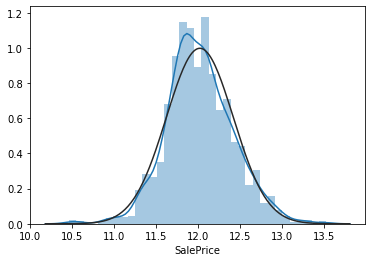

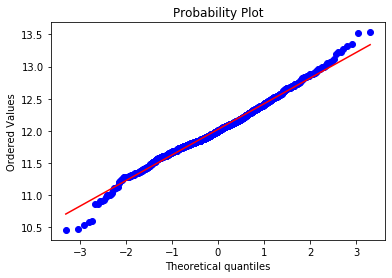

In [14]:
plot_dist(Y['SalePrice'])

In [15]:
print(X.shape)
print(Y.shape)
print(X.dtypes)
print(Y.dtypes)

(1459, 61)
(1459, 1)
MSSubClass       float64
MSZoning         float64
LotArea          float64
Street           float64
LotShape         float64
LandContour      float64
Utilities        float64
LotConfig        float64
LandSlope        float64
Neighborhood     float64
Condition1       float64
Condition2       float64
BldgType         float64
HouseStyle       float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
RoofStyle        float64
RoofMatl         float64
Exterior1st      float64
Exterior2nd      float64
ExterQual        float64
ExterCond        float64
Foundation       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating          float64
                  ...   
CentralAir       float64
Electrical       float64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
Full

In [16]:
# Primeira tecnica de feature selection - Univariate Selection

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,Y['SalePrice'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs        Score
14   OverallQual  2932.749675
36     GrLivArea  1407.269586
47    GarageCars  1257.624983
48    GarageArea  1071.162399
28   TotalBsmtSF   875.430604
33      1stFlrSF   807.778139
39      FullBath   798.054058
16     YearBuilt   765.277004
22     ExterQual   747.309552
17  YearRemodAdd   686.135209


In [17]:
from sklearn.metrics import mean_squared_error

def rmse(estimador, X, y):

    ''' Método para calcular o erro utilizando RMSLE

    :param estimador: eh um modelo jah treinado
    :param X: features
    :param y: alvo
    :return: erro
    '''

    p = estimador.predict(X)
    return np.sqrt(mean_squared_error(np.exp(y), np.exp(p)))


def select_features(X, features):

    
    dataset = pd.DataFrame(X[features[0]])

    for col in features[1:]:
        # Expande a coluna
        dataset = dataset.join(X[col], how='left')
        
    return dataset


In [18]:
columns = list()
columns.append(featureScores.nlargest(10,'Score')['Specs'].tolist())
features = select_features(X, columns[0])

features.shape

(1459, 10)

In [19]:
# Baseline Model

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

def executa_modelo_base(features, Y):
    kf = KFold(n_splits=5)

    model = LinearRegression()

    error = cross_val_score(model, features, Y, cv=kf, scoring=rmse)

    print("Erro medio no modelo base", error.mean())
    
executa_modelo_base(features, Y)

Erro medio no modelo base 52799.34483844474


[6.69131423e-03 1.45219133e-02 7.41873192e-03 1.72801164e-04
 3.29389222e-03 2.49915022e-03 1.37103737e-05 1.82310866e-03
 2.16354681e-03 5.10352296e-03 2.00877546e-03 4.77214798e-04
 3.94409916e-03 2.99846434e-03 1.79912063e-01 8.16158265e-03
 2.10856747e-02 3.33312666e-02 2.41292520e-03 6.15479871e-04
 2.17351001e-03 2.28710544e-03 1.64834537e-01 4.17863446e-03
 1.92455619e-03 2.09306949e-02 1.69007260e-03 5.24394017e-03
 1.79656405e-02 1.52851741e-03 2.51625223e-03 2.63620673e-02
 1.08774960e-03 2.30034111e-02 7.37173846e-03 5.76926347e-04
 7.04508029e-02 6.82492251e-03 2.19140758e-03 4.90544751e-02
 5.16287128e-03 1.20455404e-02 2.09310628e-03 5.27145457e-02
 4.66421691e-03 2.96661866e-03 2.97780938e-02 1.18793787e-01
 2.47937909e-02 1.07893313e-02 3.26927743e-03 3.96500856e-03
 2.05049913e-03 5.55843214e-04 1.12878034e-03 4.91548488e-05
 9.62746748e-04 3.93561251e-03 2.34248985e-03 1.59896252e-03
 5.49352338e-03]


/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


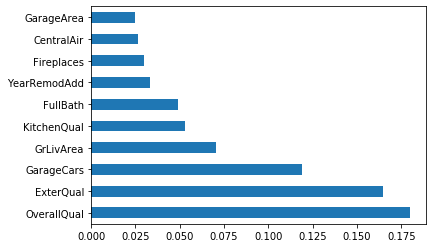

In [20]:
#Feature importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
columns.append(feat_importances.nlargest(10).index.tolist())

In [22]:
features = select_features(X, columns[1])

executa_modelo_base(features, Y)

Erro medio no modelo base 38923.84690216931


In [23]:
#Boruta

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=200, n_jobs=4)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)

y = Y.values.ravel()
x = X.values
features = boruta_selector.fit(x, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	61
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	43
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	43
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	43
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	43
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	43
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	43
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	43
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	43
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	0
Reject

In [24]:
print(boruta_selector.support_)

# check ranking of features
print(boruta_selector.ranking_)

# call transform() on X to filter it down to selected features
features_boruta = boruta_selector.transform(x)

[False  True  True False False False False False False  True False False
 False False  True  True  True  True False False False False False False
 False  True False  True  True False False  True False  True  True False
  True False False False False False False False False False  True  True
  True False False False False False False False False False False False
 False]
[ 5  1  1 44 11 19 45 31 27  1 30 41 27 23  1  1  1  1 29 39  8 16 13 15
 26  1 34  1  1 37 22  1 32  1  1 38  1 20 36  8 25 14 10  4  6 24  1  1
  1 18  3  2 16 42 35 43 40  7 21 33 12]


In [25]:
print(features_boruta.shape)
indx = 0
columns.append([])
for col in X.columns:
    if boruta_selector.support_[indx]:
        print(col)
        columns[2].append(col)
    indx+=1


(1459, 17)
MSZoning
LotArea
Neighborhood
OverallQual
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF1
BsmtUnfSF
TotalBsmtSF
CentralAir
1stFlrSF
2ndFlrSF
GrLivArea
Fireplaces
GarageCars
GarageArea


In [26]:
executa_modelo_base(features_boruta, Y)

Erro medio no modelo base 56698.131553587955


In [27]:
selected_features = [item for sublist in columns for item in sublist ]

In [28]:
selected_features = list(set(selected_features))
print(selected_features)

['TotalBsmtSF', '1stFlrSF', 'ExterQual', 'YearBuilt', '2ndFlrSF', 'FullBath', 'KitchenQual', 'MSZoning', 'OverallQual', 'BsmtUnfSF', 'YearRemodAdd', 'LotArea', 'GarageCars', 'GarageArea', 'CentralAir', 'GrLivArea', 'Fireplaces', 'Neighborhood', 'OverallCond', 'BsmtFinSF1']


In [29]:
features = select_features(X, selected_features)

executa_modelo_base(features, Y)

Erro medio no modelo base 55409.805303048415


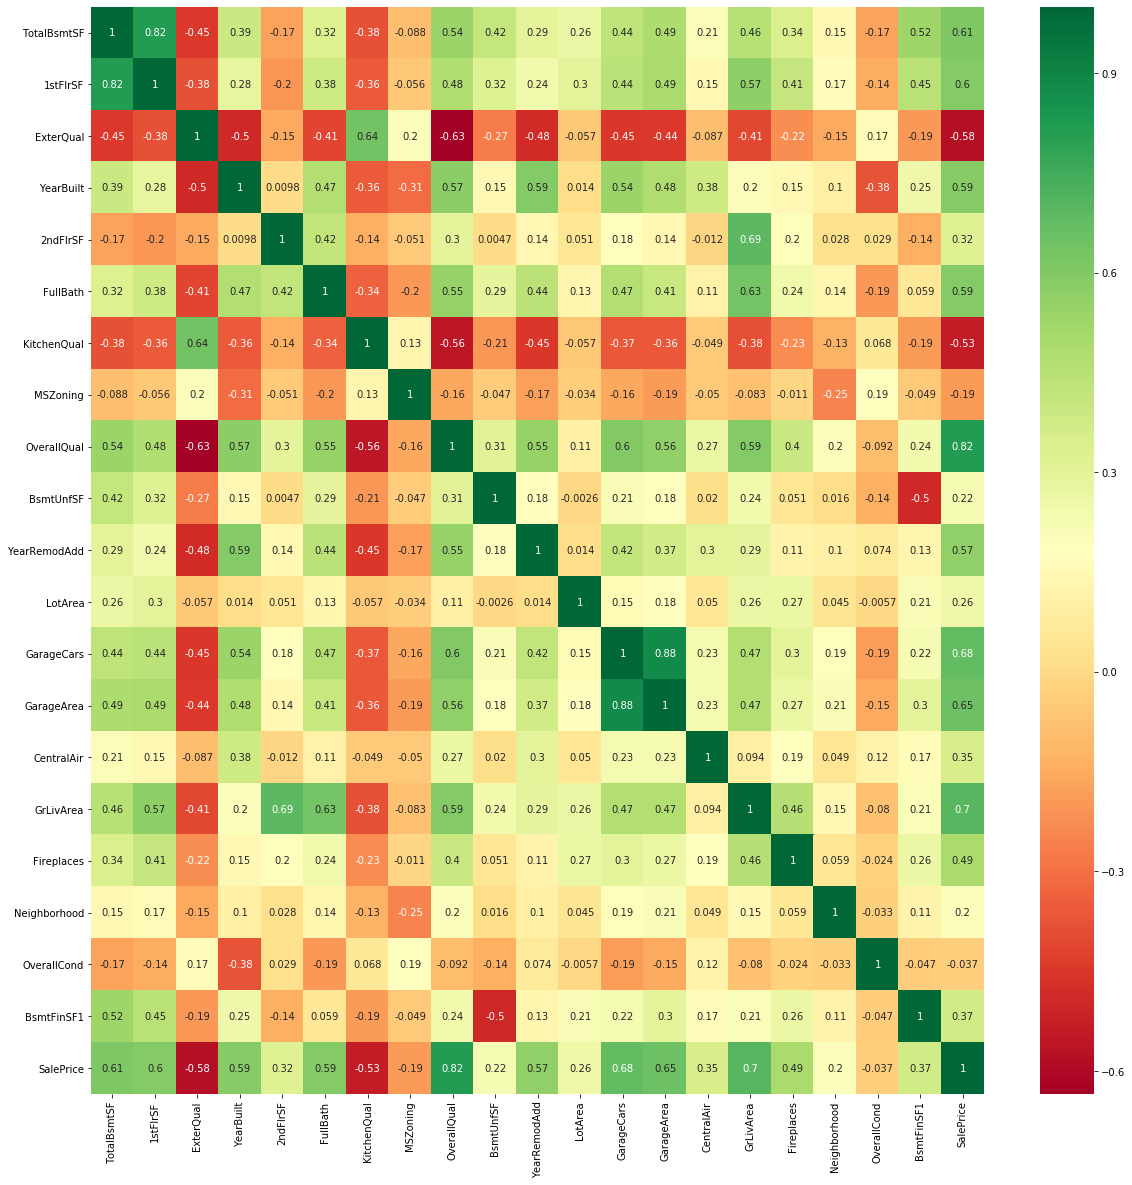

In [30]:
# Análise das features selecionadas

data = features.copy()
data['SalePrice'] = Y

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

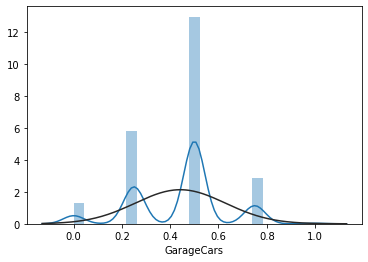

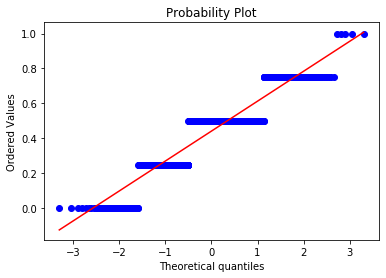

In [31]:
# GarageCars x GarageArea

plot_dist(features['GarageCars'])

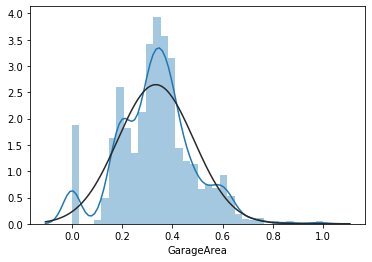

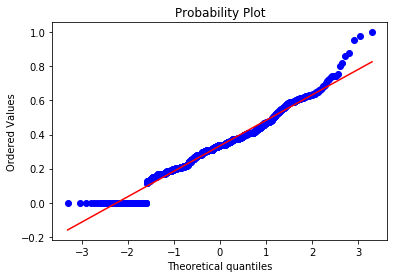

In [32]:
plot_dist(features['GarageArea'])

In [33]:
for col in ['1stFlrSF', 'BsmtFinSF1', 'CentralAir', 'OverallCond', 'LotArea', '2ndFlrSF', 'BsmtUnfSF', 'MSZoning','Neighborhood']:
        print("Removendo coluna " + str(col))
        selected_features.remove(col)

Removendo coluna 1stFlrSF
Removendo coluna BsmtFinSF1
Removendo coluna CentralAir
Removendo coluna OverallCond
Removendo coluna LotArea
Removendo coluna 2ndFlrSF
Removendo coluna BsmtUnfSF
Removendo coluna MSZoning
Removendo coluna Neighborhood


In [34]:
selected_features

['TotalBsmtSF',
 'ExterQual',
 'YearBuilt',
 'FullBath',
 'KitchenQual',
 'OverallQual',
 'YearRemodAdd',
 'GarageCars',
 'GarageArea',
 'GrLivArea',
 'Fireplaces']

In [35]:
features = select_features(X, selected_features)

In [36]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

model = Lasso(alpha =0.0005, random_state=1)

kf = KFold(n_splits=5)

error = cross_val_score(model, features, Y, cv=kf, scoring=rmse)

print("Erro medio no modelo base", error.mean())

Erro medio no modelo base 47616.83239972169


/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


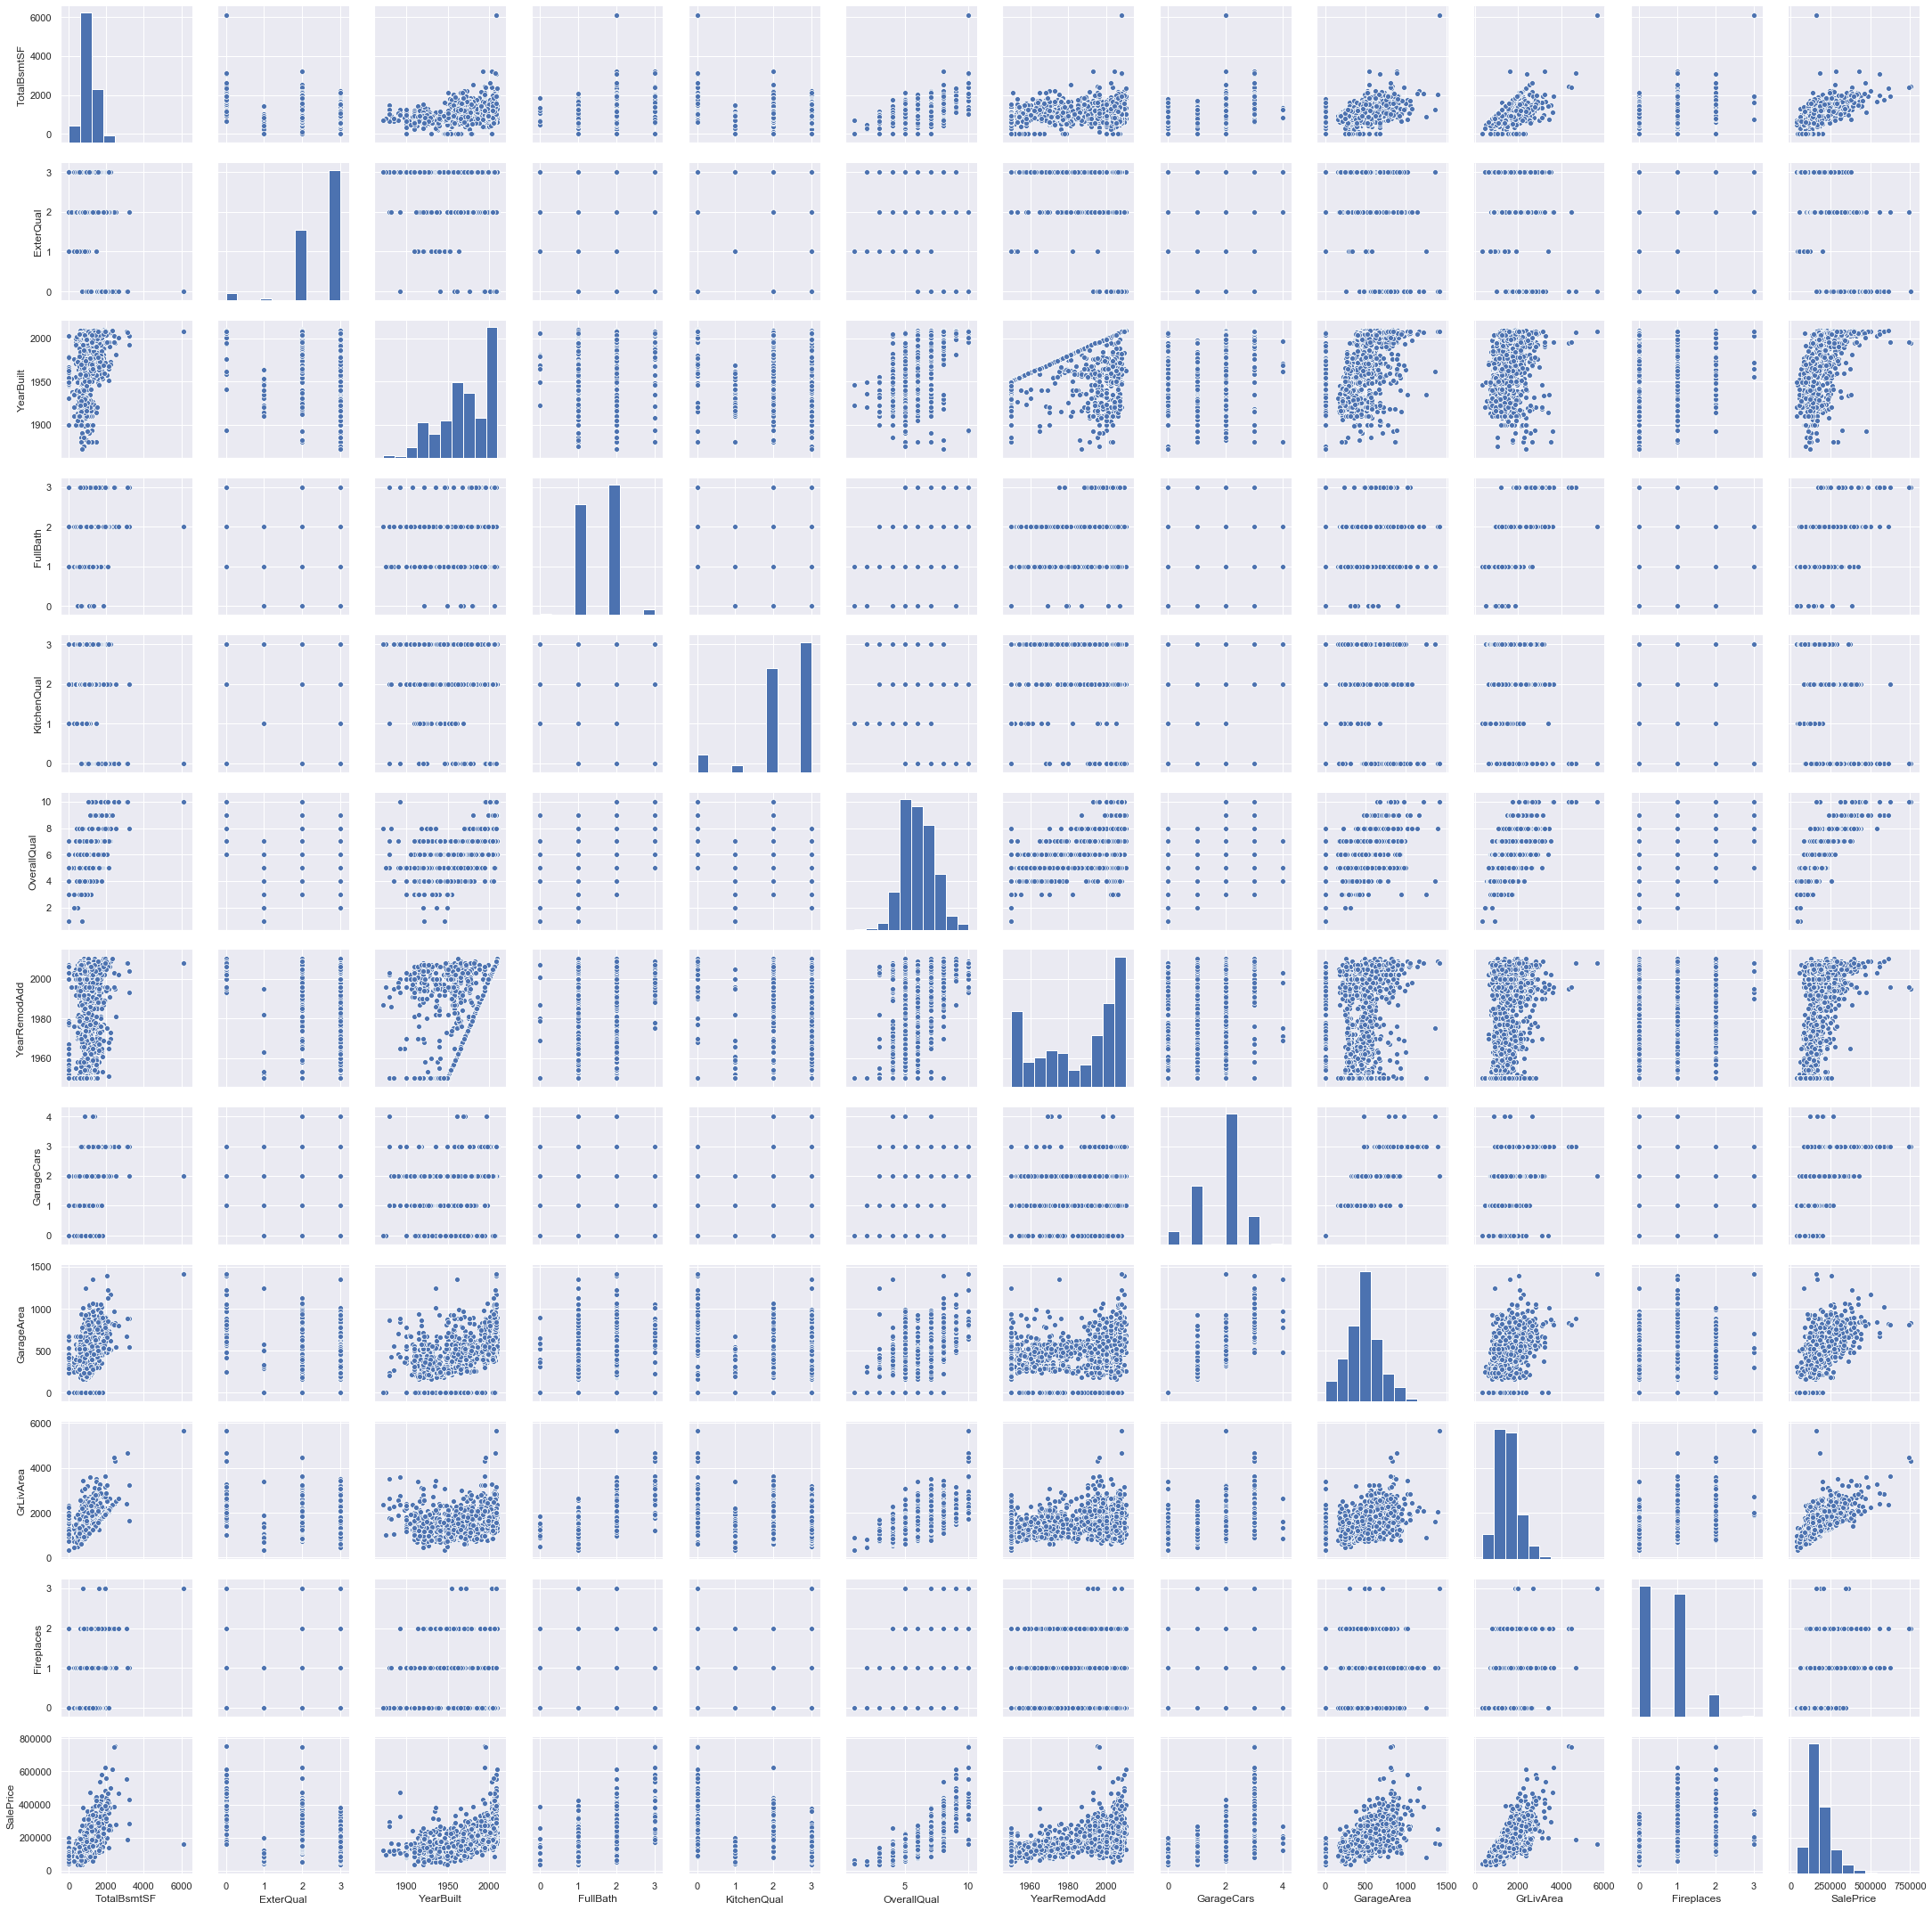

In [37]:
sns.set()
selected_features.append('SalePrice')
sns.pairplot(df_train[selected_features], size = 2.5)
plt.show();

In [38]:
train = df_train[selected_features]
train['SalePrice'] = np.log(train['SalePrice'])

/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
train.head(5)

,TotalBsmtSF,ExterQual,YearBuilt,FullBath,KitchenQual,OverallQual,YearRemodAdd,GarageCars,GarageArea,GrLivArea,Fireplaces,SalePrice
Id,,,,,,,,,,,,
1,856,2,2003,2,2,7,2003,2,548,1710,0,12.247694
2,1262,3,1976,2,3,6,1976,2,460,1262,1,12.109011
3,920,2,2001,2,2,7,2002,2,608,1786,1,12.317167
4,756,3,1915,1,2,7,1970,3,642,1717,1,11.849398
5,1145,2,2000,2,2,8,2000,3,836,2198,1,12.429216


In [40]:
print(train.shape)
train = pd.get_dummies(train)
print(train.shape)
train.head(5)

(1459, 12)
(1459, 12)


,TotalBsmtSF,ExterQual,YearBuilt,FullBath,KitchenQual,OverallQual,YearRemodAdd,GarageCars,GarageArea,GrLivArea,Fireplaces,SalePrice
Id,,,,,,,,,,,,
1,856,2,2003,2,2,7,2003,2,548,1710,0,12.247694
2,1262,3,1976,2,3,6,1976,2,460,1262,1,12.109011
3,920,2,2001,2,2,7,2002,2,608,1786,1,12.317167
4,756,3,1915,1,2,7,1970,3,642,1717,1,11.849398
5,1145,2,2000,2,2,8,2000,3,836,2198,1,12.429216


In [41]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [42]:
n_folds = 5

def rmsle_cv(model, train, y_train):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [43]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [44]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [64]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [46]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [47]:
y_train = pd.DataFrame(train['SalePrice'])
train = train.drop('SalePrice', axis=1)

score = rmsle_cv(lasso, train, y_train)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1684 (0.0242)



In [48]:
score = rmsle_cv(ENet, train, y_train)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1684 (0.0242)



In [66]:
score = rmsle_cv(KRR, train, y_train)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.34762e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.00048e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.3348e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=9.74494e-18): result may not be accurate.
  overwrite_a=False)



Lasso score: 0.1562 (0.0188)



/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.23494e-17): result may not be accurate.
  overwrite_a=False)


In [50]:
score = rmsle_cv(GBoost, train, y_train)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T


Lasso score: 0.1580 (0.0152)



In [51]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [52]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models, train, y_train)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.34762e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3

 Averaged base models score: 0.1516 (0.0137)



/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.23494e-17): result may not be accurate.
  overwrite_a=False)


In [60]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [78]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models, train, y_train['SalePrice'])
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
(234,)
(234,)
(234,)
(234,)
(233,)
(233,)
(233,)
(233,)
(233,)
(233,)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, mi

/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.08587e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.38631e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.75634e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.71424e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaiol

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
(234,)
(234,)
(234,)
(234,)
(233,)
(233,)
(233,)
(233,)
(233,)
(233,)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, mi

/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.71048e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.64411e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.54965e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.53099e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaiol

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
(234,)
(234,)
(234,)
(234,)
(233,)
(233,)
(233,)
(233,)
(233,)
(233,)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, mi

/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.4147e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.70231e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.33483e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.71588e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
(234,)
(234,)
(234,)
(234,)
(233,)
(233,)
(233,)
(233,)
(233,)
(233,)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, mi

/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.94256e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.95361e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.91666e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.65988e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaiol

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True,
                            l1_ratio=0.9, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=3,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)
(234,)
(234,)
(234,)
(234,)
(234,)
(234,)
(233,)
(233,)
(233,)
(233,)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, mi

/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=3.18372e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.51211e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.9733e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli/.local/share/virtualenvs/feature_selection-_l5GG74D/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.64778e-17): result may not be accurate.
  overwrite_a=False)
/Users/marcosrabaioli

Stacking Averaged models score: 0.1500 (0.0166)
